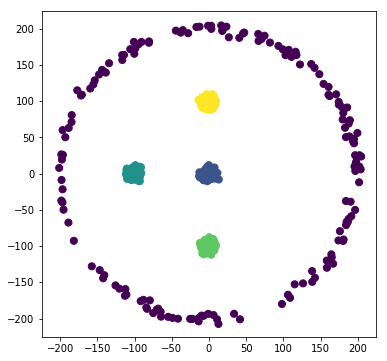

KeyboardInterrupt: 

In [1]:
import socket
import time
import numpy as np
import datetime
from math import cos, sin, pi
import time, threading
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
    
def point_on_circle(center,angle):
    #center of circle, angle in degree and radius of circle
    radius = 200
    x = center[0] + (radius * cos((angle/360)*2*pi))
    y = center[1] + (radius * sin((angle/360)*2*pi))
    return x,y

def incRadius():
    global clusterRadius;
    global clusterMeans;
    
    clusterRadius = (clusterRadius + 1)%365
    [x,y] = point_on_circle([0,0],clusterRadius)
    clusterMeans[0][0] = x
    clusterMeans[0][1] = y
    
    threading.Timer(1, incRadius).start()

data = 'abcdefg\n'
to_be_sent = data.encode('utf-8')

#import socket
# Create a socket with the socket() system call
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)    
# Bind the socket to an address using the bind() system call
s.bind(('localhost', 11136))
# Enable a server to accept connections. 
# It specifies the number of unaccepted connections 
# that the system will allow before refusing new connections
s.listen(1)
# Accept a connection with the accept() system call
conn, addr = s.accept()                                 
# Send data. It continues to send data from bytes until either
# all data has been sent or an error occurs. It returns None.

numClusters = 5
clusterCovs = [[20, 0], [0, 20]]
clusterMeans = [[0,0],[0,0],[-100,0],[0,-100],[0,100]]
clusterRadius = -1;

incRadius()
i = 0
points_x=[]
points_y=[]
selected_clusters=[]
while True:
    #generate points at random considering the cluster centers
    selected_cluster = np.random.randint(numClusters, size=1)[0]
    [x, y] = np.random.multivariate_normal(clusterMeans[selected_cluster], clusterCovs, 1)[0]
    #print(x,y)

    #training = datetime.datetime.now().strftime("%m/%d/%Y, %H:%M:%S")    
    #training = '{ timestamp: ' + now_str + ', value_x: '  + str(x) + ', value_y: '  + str(y) + ' }\n'
    #test = '(' +str(selected_cluster) + '.0) [' +str(x) + ', '  + str(y)+ ']'
    display.clear_output(wait=True)
    points_x=points_x + [x]
    points_y=points_y + [y]
    selected_clusters = selected_clusters + [selected_cluster] 
    training = str(x) + ' '  + str(y) + '\n'
    #estatico = str(selected_cluster) + ' ' + '1:' + str(x) + ' 2:'  + str(y)
    plt.figure(figsize=(6,6))
    plt.scatter(points_x, points_y, c=selected_clusters, s=50, alpha=1) 
    plt.xlim(-225,  225)
    plt.ylim(-225,  225)
    plt.pause(0.10)
    i+=1
    conn.sendall(training.encode('utf-8'))                                    
    time.sleep(0.10);
    
conn.close()

In [ ]:
ssc.stop()